In [1]:
## Importing support libraries
import numpy as np ## for numerical calculations of arrays
import pandas as pd ## for reading csv file and wroking with dataframe operations
from PIL import Image ## for image processing and output
import cv2 ## for image processing
from numpy import linalg as LA ## numpy's Linear Algebra library
import os ## for reading images from image folder
import math
from scipy.spatial import distance ## for calculating distance between two entities
import requests ## to get the file from url

from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
images = np.load('olivetti_faces.npy')
target = np.load('olivetti_faces_target.npy')
print(images.shape, target.shape)

(400, 64, 64) (400,)


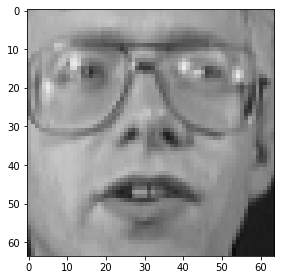

In [3]:
from skimage.io import imshow
loadImage = images[13]
imshow(loadImage) 

In [4]:
loadImage

array([[0.6280992 , 0.6446281 , 0.6735537 , ..., 0.5495868 , 0.5371901 ,
        0.5       ],
       [0.6446281 , 0.6652893 , 0.6859504 , ..., 0.54545456, 0.5661157 ,
        0.5413223 ],
       [0.661157  , 0.6818182 , 0.677686  , ..., 0.53305787, 0.55785125,
        0.57438016],
       ...,
       [0.19421488, 0.4752066 , 0.5413223 , ..., 0.11157025, 0.10743801,
        0.10743801],
       [0.14876033, 0.43801653, 0.57024795, ..., 0.10743801, 0.10330579,
        0.10330579],
       [0.13636364, 0.39256197, 0.59090906, ..., 0.10330579, 0.10743801,
        0.10743801]], dtype=float32)

In [5]:
total_images = 400
total_classes = 10

In [6]:
data = images.reshape(images.shape[0], images.shape[1] * images.shape[2])
print(data.shape)

(400, 4096)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [8]:
n_comp = 10
pca = PCA(n_components=n_comp, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Text(0.5, 0.98, 'All Eigen Faces')

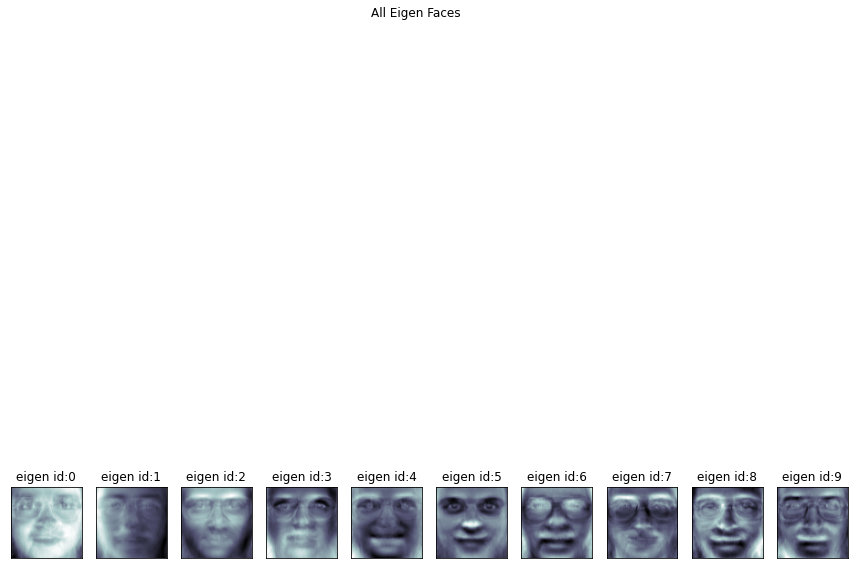

In [9]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, images.shape[1], images.shape[2]))

a=np.zeros((64,64))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="bone")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
    a=a+eigen_faces[i]
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [10]:
np.shape(eigen_faces)

(10, 64, 64)

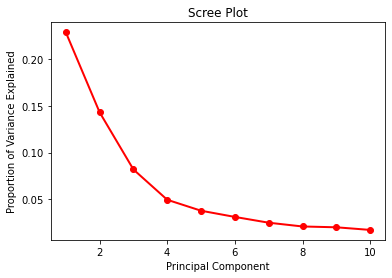

In [11]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [12]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


done in 12.040s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.1)


In [13]:
model = clf.best_estimator_

In [14]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))

0.93


Text(0.5, 1.0, 'Average Face')

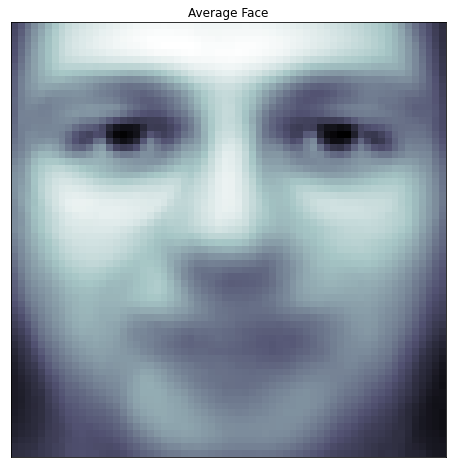

In [15]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="bone")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [16]:
fig, axarr=plt.subplots(nrows=40, ncols=6, figsize=(100, 200))
axarr=axarr.flatten()
i = 0
for x,y in zip(y_test,y_pred):
    x=x*10
    y=y*10
    axarr[i].imshow(images[x],cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("Actual - face id:  {}".format(x), fontsize=50)
    i=i+1
    axarr[i].imshow(images[y],cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title(" Predicted - face id: {}".format(y), fontsize=50)
    i = i+1